# Overview
The stock market is very unpredictable, any geopolitical change can impact the share trend of stocks in the share market, recently we have seen how covid-19 has impacted the stock prices, which is why on financial data doing a reliable trend analysis is very difficult. The most efficient way to solve this kind of issue is with the help of Machine learning and Deep learning. We use Recurrent Neural Networks for time series forecasting of all the banks under Bank Nifty.

# Streaming Data
Also known as event stream processing, streaming data is the continuous flow of data generated by various sources. By using stream processing technology, data streams can be processed, stored, analyzed, and acted upon as it's generated in real-time.

# Time Series Forecasting
Time series data is recorded at regular time intervals, and the order of these data points is important. Therefore, any predictive model based on time series data will have time as an independent variable. The output of a model would be the predicted value or classification at a specific time. We use stock price data over a period of two years as a time series to predict the future price of those shares.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

# Data Loading
We use ticker method to retrieve the data from Yahoo Finance website. In another approach we use the existing dataset that contains stock prices for over a period of 3 months for all the banks under Bank Nifty.

In [2]:
df= yf.Ticker("^NSEBANK").history(period='2y').reset_index()
df_axis= yf.Ticker("AXISBANK.NS").history(period='2y').reset_index()
df_sbi= yf.Ticker("SBIN.NS").history(period='2y').reset_index()
df_rbl= yf.Ticker("RBLBANK.NS").history(period='2y').reset_index()
df_pnb= yf.Ticker("PNB.NS").history(period='2y').reset_index()
df_kot= yf.Ticker("KOTAKBANK.NS").history(period='2y').reset_index()
df_ind= yf.Ticker("INDUSINDBK.NS").history(period='2y').reset_index()
df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='2y').reset_index()
df_icic= yf.Ticker("ICICIBANK.NS").history(period='2y').reset_index()
df_band= yf.Ticker("BANDHANBNK.NS").history(period='2y').reset_index()
df_hdfc= yf.Ticker("HDB").history(period='2y').reset_index()
df_fed= yf.Ticker("FEDERALBNK.NS").history(period='2y').reset_index()
df_au= yf.Ticker("AUBANK.NS").history(period='2y').reset_index()

In [3]:
df.head()

Date          Open          High           Low  \
0 2021-11-30 00:00:00+05:30  35958.383662  36773.772641  35525.939460   
1 2021-12-01 00:00:00+05:30  35902.481922  36444.928754  35804.584620   
2 2021-12-02 00:00:00+05:30  36281.428422  36563.073574  36166.277421   
3 2021-12-03 00:00:00+05:30  36496.875408  36843.570586  36062.431253   
4 2021-12-06 00:00:00+05:30  36252.329949  36344.129666  35696.336391   

          Close  Volume  Dividends  Stock Splits  
0  35694.886719  227300        0.0           0.0  
1  36364.476562  173900        0.0           0.0  
2  36507.824219  131700        0.0           0.0  
3  36196.726562  138900        0.0           0.0  
4  35735.484375  136000        0.0           0.0

# Historical Data of NSE 

In [4]:
#import plotly.express as px
fig = px.line(df, x='Date', y="Open")
fig.show()

In [5]:
print("RBL BANK Data Date till and from")
print(df_rbl.Date.max())
print(df_rbl.Date.min())
print("AXIS BANK Data Date till and from")
print(df_axis.Date.max())
print(df_axis.Date.min())

RBL BANK Data Date till and from
2023-11-30 00:00:00+05:30
2021-11-30 00:00:00+05:30
AXIS BANK Data Date till and from
2023-11-30 00:00:00+05:30
2021-11-30 00:00:00+05:30


Text(0.5, 1.0, 'au')

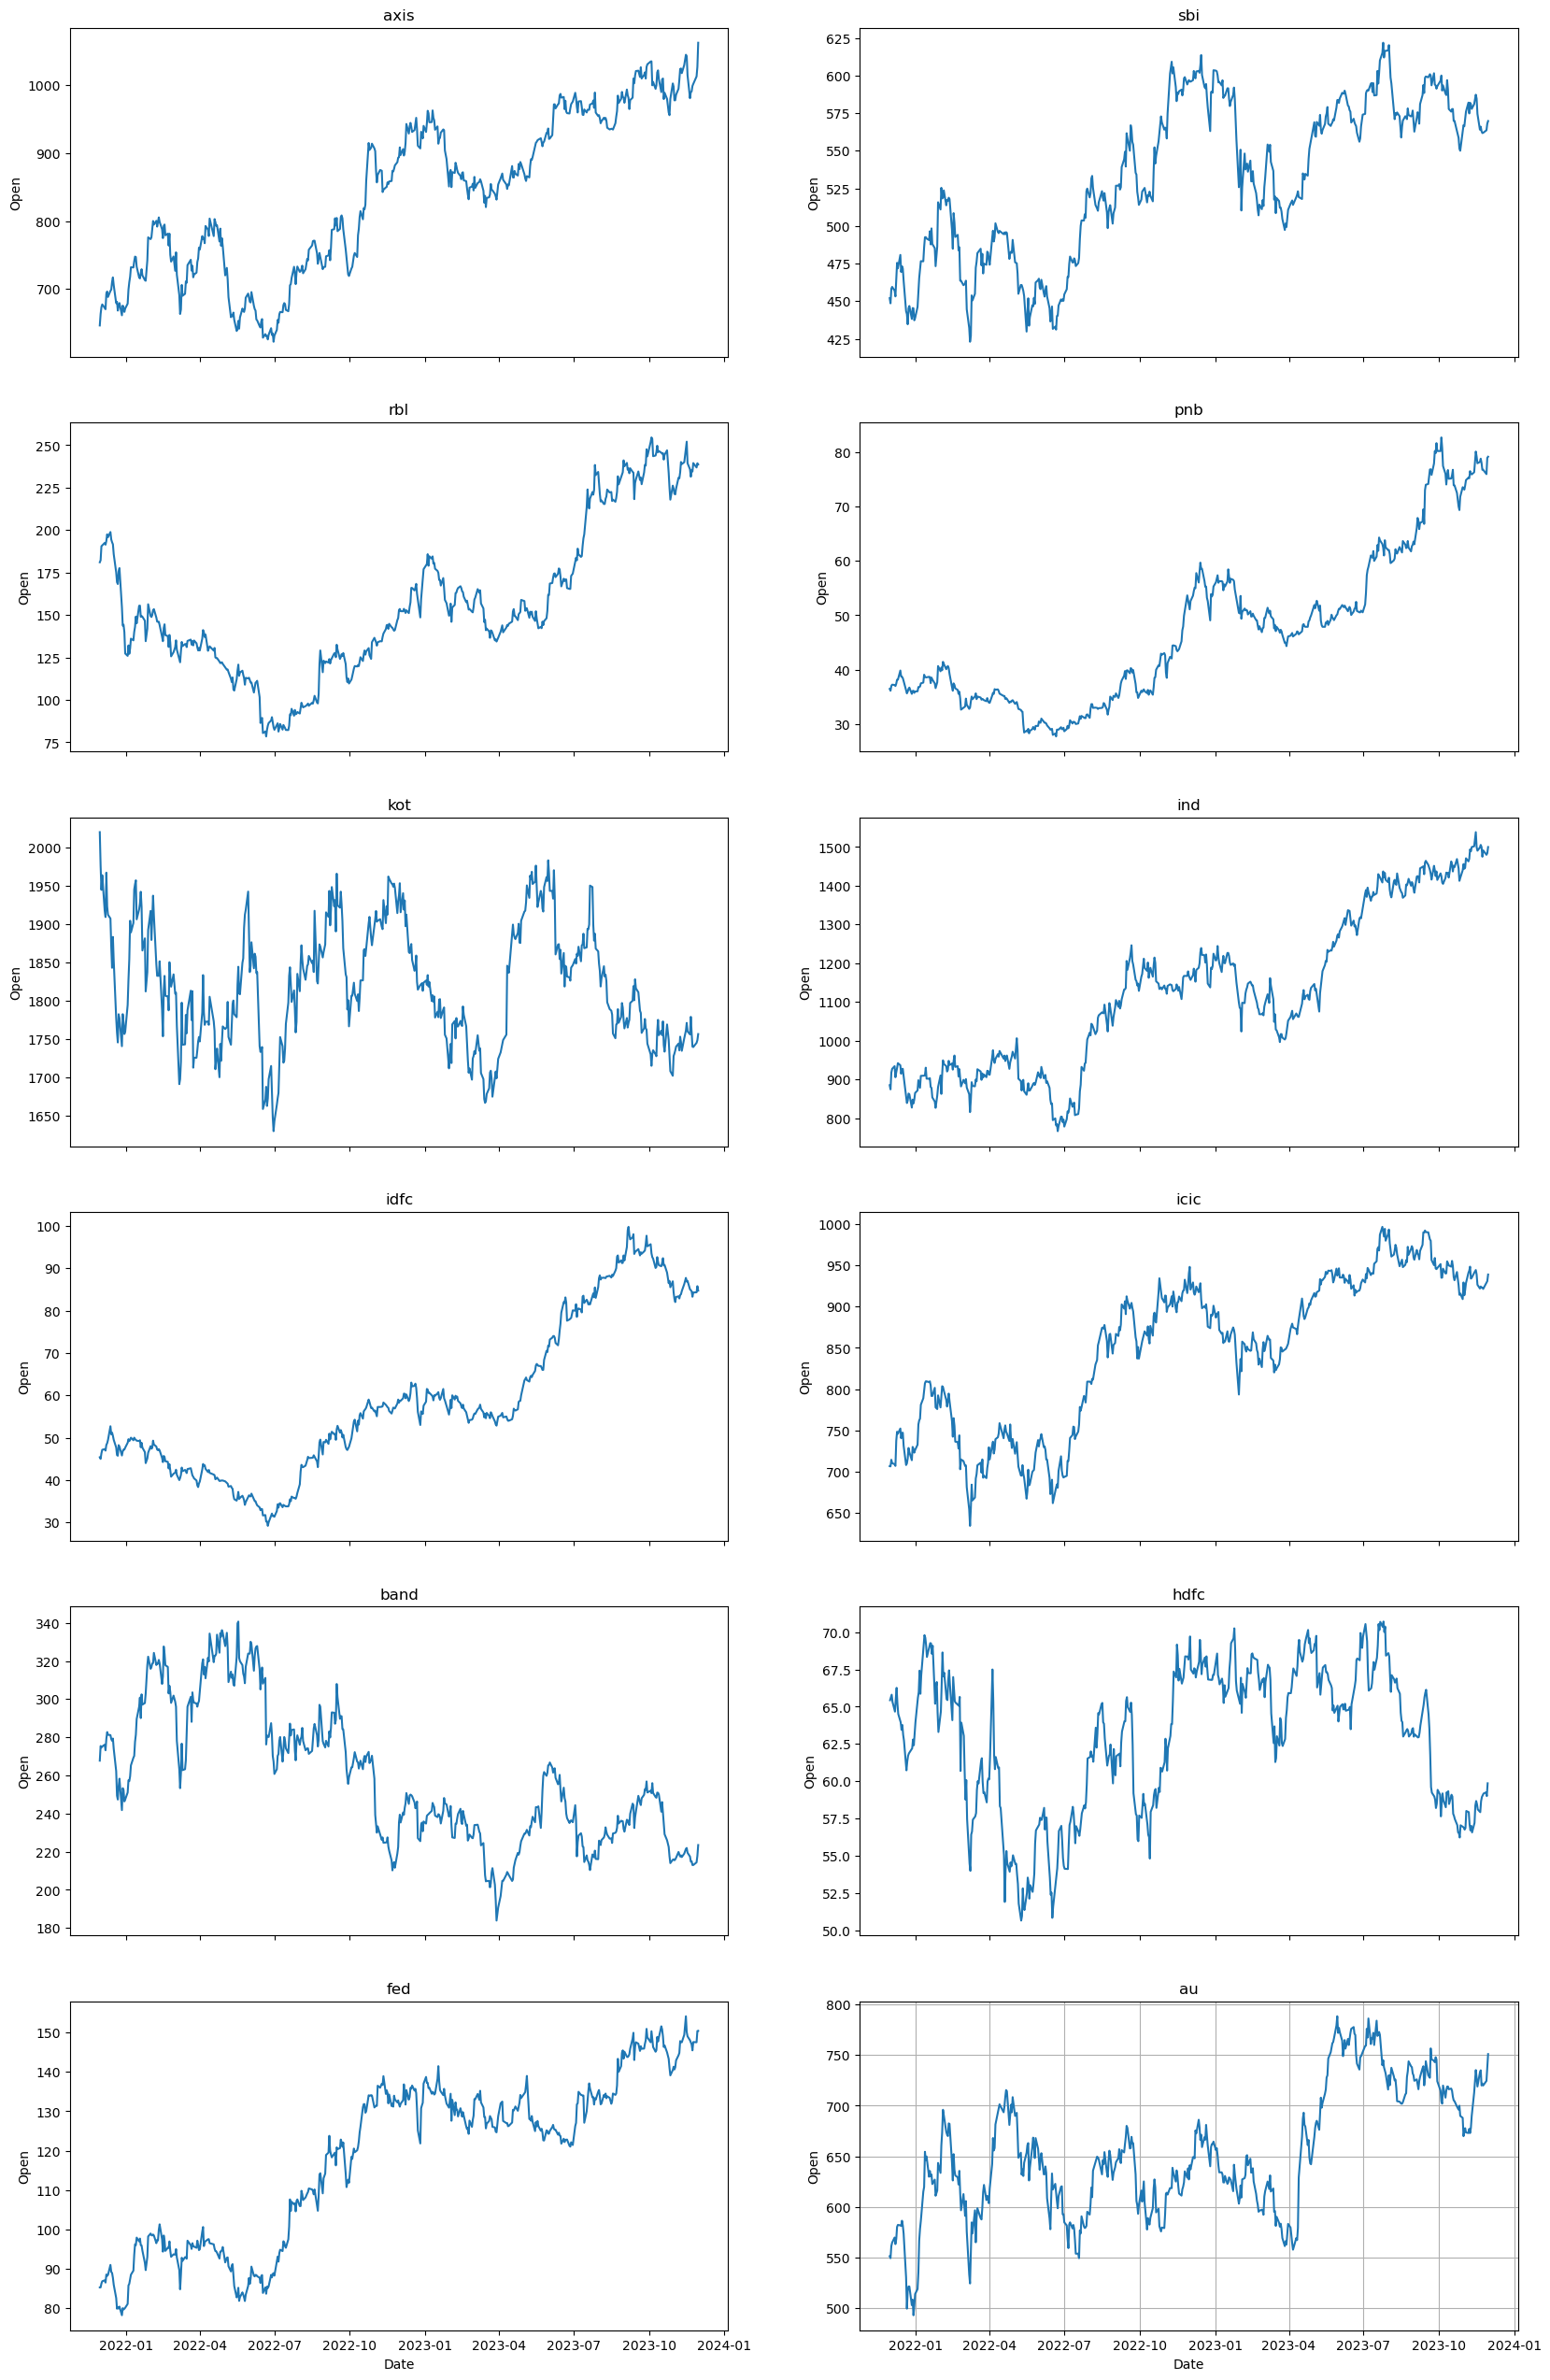

In [6]:
fig, axes = plt.subplots(6, 2, sharex=True, figsize=(20,32))
plt.grid(True)
sns.lineplot(ax=axes[0, 0], data=df_axis, x='Date', y='Open')
axes[0,0].set_title('axis')
sns.lineplot(ax=axes[0, 1], data=df_sbi, x='Date', y='Open')
axes[0,1].set_title('sbi')
sns.lineplot(ax=axes[1, 0], data=df_rbl, x='Date', y='Open')
axes[1,0].set_title('rbl')
sns.lineplot(ax=axes[1, 1], data=df_pnb, x='Date', y='Open')
axes[1,1].set_title('pnb')
sns.lineplot(ax=axes[2, 0], data=df_kot, x='Date', y='Open')
axes[2,0].set_title('kot')
sns.lineplot(ax=axes[2, 1], data=df_ind, x='Date', y='Open')
axes[2,1].set_title('ind')
sns.lineplot(ax=axes[3, 0], data=df_idfc, x='Date', y='Open')
axes[3,0].set_title('idfc')
sns.lineplot(ax=axes[3, 1], data=df_icic, x='Date', y='Open')
axes[3,1].set_title('icic')
sns.lineplot(ax=axes[4, 0], data=df_band, x='Date', y='Open')
axes[4,0].set_title('band')
sns.lineplot(ax=axes[4, 1], data=df_hdfc, x='Date', y='Open')
axes[4,1].set_title('hdfc')
sns.lineplot(ax=axes[5, 0], data=df_fed, x='Date', y='Open')
axes[5,0].set_title('fed')
sns.lineplot(ax=axes[5,1], data=df_au, x='Date', y='Open')
axes[5,1].set_title('au')

# DATA PRE-PROCESSING

In [7]:
print(df.shape)
date_train=pd.to_datetime(df['Date'])
date_train

(496, 8)


0     2021-11-30 00:00:00+05:30
1     2021-12-01 00:00:00+05:30
2     2021-12-02 00:00:00+05:30
3     2021-12-03 00:00:00+05:30
4     2021-12-06 00:00:00+05:30
                 ...           
491   2023-11-23 00:00:00+05:30
492   2023-11-24 00:00:00+05:30
493   2023-11-28 00:00:00+05:30
494   2023-11-29 00:00:00+05:30
495   2023-11-30 00:00:00+05:30
Name: Date, Length: 496, dtype: datetime64[ns, Asia/Kolkata]

# STANDARD SCALER
StandardScaler is a preprocessing class in the scikit-learn library, which is a popular machine learning library in Python. The StandardScaler is used for standardizing features by removing the mean and scaling to unit variance. This process is often referred to as "z-score normalization" or "standardization."

Here, X_train and X_test are your training and test datasets, respectively. The fit_transform method is used on the training data to compute the mean and standard deviation needed for scaling, and then the same transformation is applied to both the training and test datasets.

The standardization formula applied by StandardScaler to each feature (column) is:

z= x-mean/standard deviation

where 
x is a data point, and the mean and standard deviation are computed from the training data.

In [8]:
Scale=StandardScaler()
def data_prep(df, lookback, future, Scale):
    # Extracting relevant columns and converting to float
    df_train = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']].astype(float)
    
    # Scaling the features
    df_train_scaled = Scale.fit_transform(df_train)

    # Creating input sequences (X) and corresponding target values (y)
    x, y = [], []
    for i in range(lookback, len(df_train_scaled) - future + 1):
        x.append(df_train_scaled[i - lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i + future - 1:i + future, 0])

    return np.array(x), np.array(y), df_train, pd.to_datetime(df['Date'])

Lstm_x, Lstm_y, df_train, date_train = data_prep(df, 30, 1, Scale)

In [9]:
df_train.head()

Open          High           Low         Close    Volume  \
0  35958.383662  36773.772641  35525.939460  35694.886719  227300.0   
1  35902.481922  36444.928754  35804.584620  36364.476562  173900.0   
2  36281.428422  36563.073574  36166.277421  36507.824219  131700.0   
3  36496.875408  36843.570586  36062.431253  36196.726562  138900.0   
4  36252.329949  36344.129666  35696.336391  35735.484375  136000.0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

# LSTM
LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

Long-Short-Term Memory. Recurrent Neural Network belongs to the family of deep learning algorithms. It is a recurrent network because of the feedback connections in its architecture. It has an advantage over traditional neural networks due to its capability to process the entire sequence of data. Its architecture comprises the cell, input gate, output gate and forget gate.

The input gate: The input gate adds information to the cell state, 
The forget gate: It removes the information that is no longer required by the model, 
The output gate: Output Gate at LSTM selects the information to be shown as output.

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [10]:
def Lstm_fallback(x,y):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu',input_shape=(x.shape[1], X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y.shape[1], activation='relu'))

    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  
    model.compile(
            loss='mse',
            optimizer=opt,
        )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)
    return model


In [11]:
def Lstm_model1(X, y):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [12]:
def Lstm_model2(X,y):
    model=Sequential()
    
    model.add(LSTM(20,return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #model.add(LSTM(15,return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(15))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y,validation_split=0.2,epochs=100,batch_size=64,verbose=1, callbacks=[es])
    return model

# Prediction

In [13]:
def predict_open(model,date_train,Lstm_x,df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted=model.predict(Lstm_x[-future:])
    predicted1=np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled=Scale.inverse_transform(predicted1)[:,0]
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates,predicted_descaled):
    dates=[]
    for i in forecasting_dates:
        dates.append(i.date())
    df_final=pd.DataFrame(columns=['Date','Open'])
    df_final['Date']=pd.to_datetime(dates)
    df_final['Open']=predicted_descaled
    return df_final

In [14]:
def results(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

In [15]:
def results1(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model2(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

# Result Visualization

Epoch 1/100
7/7 [==============================] - 17s 581ms/step - loss: 0.7044 - val_loss: 0.0946
Epoch 2/100
7/7 [==============================] - 1s 124ms/step - loss: 0.2503 - val_loss: 0.0711
Epoch 3/100
7/7 [==============================] - 1s 123ms/step - loss: 0.1926 - val_loss: 0.0609
Epoch 4/100
7/7 [==============================] - 1s 124ms/step - loss: 0.1727 - val_loss: 0.0343
Epoch 5/100
7/7 [==============================] - 1s 123ms/step - loss: 0.1568 - val_loss: 0.0453
Epoch 6/100
7/7 [==============================] - 1s 120ms/step - loss: 0.1544 - val_loss: 0.0296
Epoch 7/100
7/7 [==============================] - 1s 122ms/step - loss: 0.1326 - val_loss: 0.0600
Epoch 8/100
7/7 [==============================] - 1s 120ms/step - loss: 0.1188 - val_loss: 0.0624
Epoch 9/100
7/7 [==============================] - 1s 122ms/step - loss: 0.1130 - val_loss: 0.0674
Epoch 10/100
7/7 [==============================] - 1s 121ms/step - loss: 0.1076 - val_loss: 0.0448
Epoch 11

7/7 [==============================] - 1s 117ms/step - loss: 0.0399 - val_loss: 0.0212
Epoch 84/100
7/7 [==============================] - 1s 120ms/step - loss: 0.0340 - val_loss: 0.0339
Epoch 85/100
7/7 [==============================] - 1s 121ms/step - loss: 0.0368 - val_loss: 0.0693
Epoch 86/100
7/7 [==============================] - 1s 120ms/step - loss: 0.0357 - val_loss: 0.0167
Epoch 87/100
7/7 [==============================] - 1s 122ms/step - loss: 0.0340 - val_loss: 0.0211
Epoch 88/100
7/7 [==============================] - 1s 114ms/step - loss: 0.0370 - val_loss: 0.0436
Epoch 89/100
7/7 [==============================] - 1s 111ms/step - loss: 0.0321 - val_loss: 0.0244
Epoch 90/100
1/1 [==============================] - 3s 3s/step
        Date          Open
0 2023-11-30  44383.929688
1 2023-12-01  44458.257812
2 2023-12-02  44511.093750
3 2023-12-03  44529.480469
4 2023-12-04  44508.589844


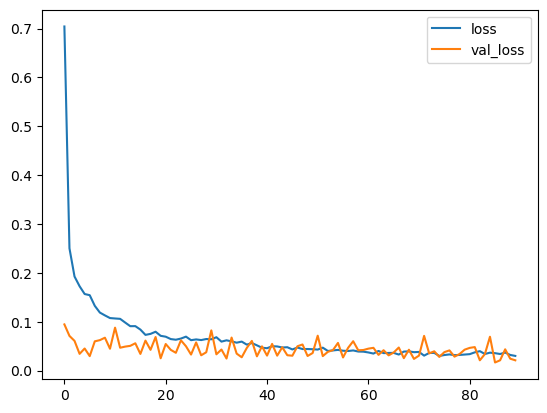

In [16]:
results(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
6/6 [==============================] - 9s 328ms/step - loss: 2.3483 - val_loss: 1.3239
Epoch 2/100
6/6 [==============================] - 0s 52ms/step - loss: 1.0132 - val_loss: 1.4283
Epoch 3/100
6/6 [==============================] - 0s 53ms/step - loss: 0.6811 - val_loss: 1.3794
Epoch 4/100
6/6 [==============================] - 0s 53ms/step - loss: 0.4716 - val_loss: 1.2965
Epoch 5/100
6/6 [==============================] - 0s 54ms/step - loss: 0.3458 - val_loss: 1.2537
Epoch 6/100
6/6 [==============================] - 0s 54ms/step - loss: 0.2862 - val_loss: 1.2256
Epoch 7/100
6/6 [==============================] - 0s 54ms/step - loss: 0.3077 - val_loss: 1.2086
Epoch 8/100
6/6 [==============================] - 0s 56ms/step - loss: 0.2505 - val_loss: 1.2054
Epoch 9/100
6/6 [==============================] - 0s 53ms/step - loss: 0.2091 - val_loss: 1.1894
Epoch 10/100
6/6 [==============================] - 0s 52ms/step - loss: 0.2187 - val_loss: 1.1377
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0718 - val_loss: 0.2329
Epoch 85/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0630 - val_loss: 0.1772
Epoch 86/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0842 - val_loss: 0.1737
Epoch 87/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0613 - val_loss: 0.2356
Epoch 88/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0551 - val_loss: 0.2618
Epoch 89/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0599 - val_loss: 0.2293
Epoch 90/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0724 - val_loss: 0.1879
Epoch 91/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0793 - val_loss: 0.1428
Epoch 92/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0661 - val_loss: 0.1202
Epoch 93/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0608 - val_loss: 0.1259
Epoch 94/1

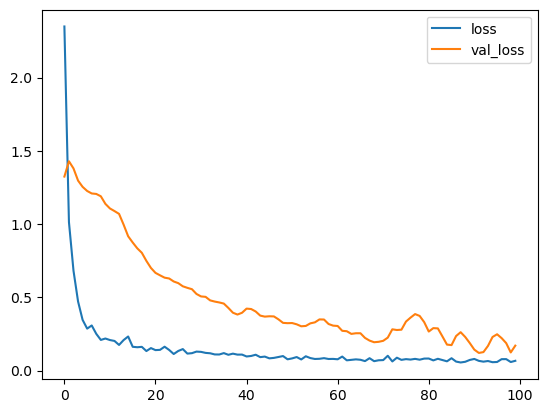

In [17]:
results1(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
6/6 [==============================] - 11s 366ms/step - loss: 0.6228 - val_loss: 1.3655
Epoch 2/100
6/6 [==============================] - 0s 54ms/step - loss: 0.4634 - val_loss: 1.4645
Epoch 3/100
6/6 [==============================] - 0s 56ms/step - loss: 0.3250 - val_loss: 1.6597
Epoch 4/100
6/6 [==============================] - 0s 57ms/step - loss: 0.2373 - val_loss: 1.7701
Epoch 5/100
6/6 [==============================] - 0s 54ms/step - loss: 0.2295 - val_loss: 1.7765
Epoch 6/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1997 - val_loss: 1.7326
Epoch 7/100
6/6 [==============================] - 0s 54ms/step - loss: 0.1762 - val_loss: 1.7698
Epoch 8/100
6/6 [==============================] - 0s 57ms/step - loss: 0.1433 - val_loss: 1.7960
Epoch 9/100
6/6 [==============================] - 0s 56ms/step - loss: 0.1678 - val_loss: 1.7794
Epoch 10/100
6/6 [==============================] - 0s 54ms/step - loss: 0.1371 - val_loss: 1.7541
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0438 - val_loss: 0.1331
Epoch 85/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0434 - val_loss: 0.1685
Epoch 86/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0370 - val_loss: 0.1542
Epoch 87/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0393 - val_loss: 0.1388
Epoch 88/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0384 - val_loss: 0.1061
Epoch 89/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0355 - val_loss: 0.1036
Epoch 90/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0463 - val_loss: 0.1347
Epoch 91/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0346 - val_loss: 0.1428
Epoch 92/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0330 - val_loss: 0.1469
Epoch 93/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0371 - val_loss: 0.1240
Epoch 94/1

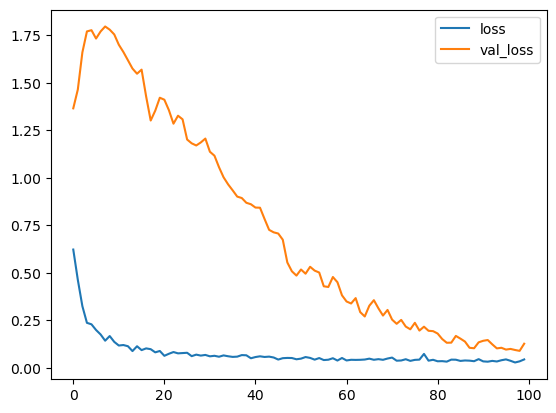

Epoch 1/100
6/6 [==============================] - 10s 374ms/step - loss: 1.7618 - val_loss: 1.4150
Epoch 2/100
6/6 [==============================] - 0s 53ms/step - loss: 0.8212 - val_loss: 1.0370
Epoch 3/100
6/6 [==============================] - 0s 56ms/step - loss: 0.5526 - val_loss: 0.8604
Epoch 4/100
6/6 [==============================] - 0s 57ms/step - loss: 0.3692 - val_loss: 0.8199
Epoch 5/100
6/6 [==============================] - 0s 51ms/step - loss: 0.3114 - val_loss: 0.8372
Epoch 6/100
6/6 [==============================] - 0s 53ms/step - loss: 0.2627 - val_loss: 0.8708
Epoch 7/100
6/6 [==============================] - 0s 56ms/step - loss: 0.2397 - val_loss: 0.8849
Epoch 8/100
6/6 [==============================] - 0s 58ms/step - loss: 0.2353 - val_loss: 0.8672
Epoch 9/100
6/6 [==============================] - 0s 52ms/step - loss: 0.2415 - val_loss: 0.8617
Epoch 10/100
6/6 [==============================] - 0s 53ms/step - loss: 0.2053 - val_loss: 0.8693
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0627 - val_loss: 0.0803
Epoch 85/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0632 - val_loss: 0.0778
Epoch 86/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0657 - val_loss: 0.0525
Epoch 87/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0724 - val_loss: 0.0433
Epoch 88/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0559 - val_loss: 0.0475
Epoch 89/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0546 - val_loss: 0.0553
Epoch 90/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0513 - val_loss: 0.0500
Epoch 91/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0746 - val_loss: 0.0519
Epoch 92/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0571 - val_loss: 0.0447
Epoch 93/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0610 - val_loss: 0.0353
Epoch 94/1

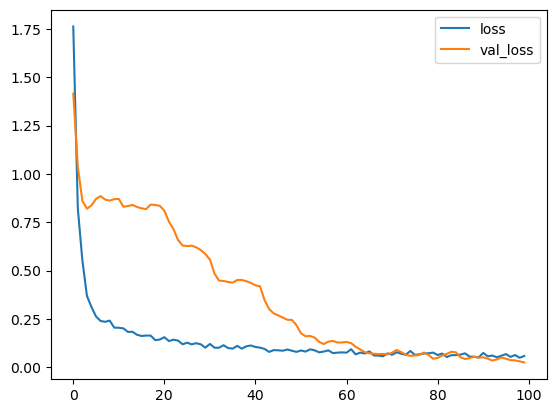

Epoch 1/100
6/6 [==============================] - 12s 374ms/step - loss: 1.2055 - val_loss: 3.2324
Epoch 2/100
6/6 [==============================] - 0s 50ms/step - loss: 0.6535 - val_loss: 3.0519
Epoch 3/100
6/6 [==============================] - 0s 57ms/step - loss: 0.3929 - val_loss: 2.9968
Epoch 4/100
6/6 [==============================] - 0s 77ms/step - loss: 0.2293 - val_loss: 3.0548
Epoch 5/100
6/6 [==============================] - 0s 63ms/step - loss: 0.1780 - val_loss: 3.1672
Epoch 6/100
6/6 [==============================] - 0s 67ms/step - loss: 0.1557 - val_loss: 3.2439
Epoch 7/100
6/6 [==============================] - 0s 58ms/step - loss: 0.1478 - val_loss: 3.2904
Epoch 8/100
6/6 [==============================] - 0s 55ms/step - loss: 0.1221 - val_loss: 3.2930
Epoch 9/100
6/6 [==============================] - 0s 58ms/step - loss: 0.1362 - val_loss: 3.2426
Epoch 10/100
6/6 [==============================] - 0s 55ms/step - loss: 0.1250 - val_loss: 3.1522
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0357 - val_loss: 1.3091
Epoch 85/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0288 - val_loss: 1.2868
Epoch 86/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0330 - val_loss: 1.2423
Epoch 87/100
6/6 [==============================] - 0s 57ms/step - loss: 0.0361 - val_loss: 1.2306
Epoch 88/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0352 - val_loss: 1.1783
Epoch 89/100
6/6 [==============================] - 0s 59ms/step - loss: 0.0274 - val_loss: 1.1650
Epoch 90/100
6/6 [==============================] - 0s 59ms/step - loss: 0.0272 - val_loss: 1.1661
Epoch 91/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0362 - val_loss: 1.1435
Epoch 92/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0320 - val_loss: 1.1368
Epoch 93/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0305 - val_loss: 1.1306
Epoch 94/1

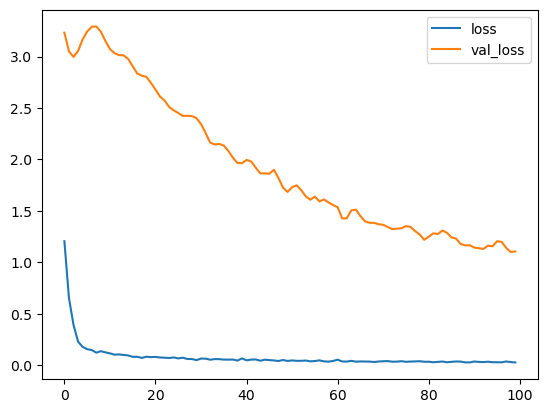

Epoch 1/100
6/6 [==============================] - 9s 336ms/step - loss: 0.3906 - val_loss: 2.8836
Epoch 2/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1805 - val_loss: 2.8014
Epoch 3/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1512 - val_loss: 2.7580
Epoch 4/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1381 - val_loss: 2.7950
Epoch 5/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1290 - val_loss: 2.8354
Epoch 6/100
6/6 [==============================] - 0s 49ms/step - loss: 0.1156 - val_loss: 2.8334
Epoch 7/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0842 - val_loss: 2.8247
Epoch 8/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0824 - val_loss: 2.8207
Epoch 9/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0886 - val_loss: 2.8191
Epoch 10/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0779 - val_loss: 2.7896
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0246 - val_loss: 0.9588
Epoch 85/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0216 - val_loss: 0.9463
Epoch 86/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0217 - val_loss: 0.9801
Epoch 87/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0248 - val_loss: 0.9966
Epoch 88/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0286 - val_loss: 0.9904
Epoch 89/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0214 - val_loss: 1.0081
Epoch 90/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0194 - val_loss: 1.0318
Epoch 91/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0320 - val_loss: 0.9814
Epoch 92/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0238 - val_loss: 0.8764
Epoch 93/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0228 - val_loss: 0.8774
Epoch 94/1

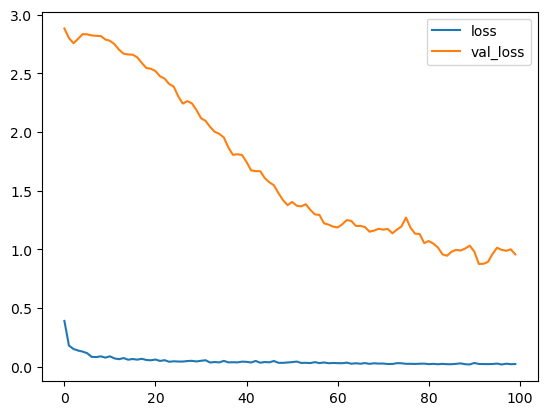

Epoch 1/100
6/6 [==============================] - 9s 467ms/step - loss: 1.3262 - val_loss: 0.4210
Epoch 2/100
6/6 [==============================] - 0s 52ms/step - loss: 0.7984 - val_loss: 0.4249
Epoch 3/100
6/6 [==============================] - 0s 53ms/step - loss: 0.5653 - val_loss: 0.4239
Epoch 4/100
6/6 [==============================] - 0s 55ms/step - loss: 0.4996 - val_loss: 0.4316
Epoch 5/100
6/6 [==============================] - 0s 51ms/step - loss: 0.3951 - val_loss: 0.4436
Epoch 6/100
6/6 [==============================] - 0s 51ms/step - loss: 0.3809 - val_loss: 0.4501
Epoch 7/100
6/6 [==============================] - 0s 52ms/step - loss: 0.3552 - val_loss: 0.4617
Epoch 8/100
6/6 [==============================] - 0s 50ms/step - loss: 0.3285 - val_loss: 0.4454
Epoch 9/100
6/6 [==============================] - 0s 56ms/step - loss: 0.2769 - val_loss: 0.4403
Epoch 10/100
6/6 [==============================] - 0s 56ms/step - loss: 0.2761 - val_loss: 0.4506
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 54ms/step - loss: 0.1064 - val_loss: 0.0975
Epoch 85/100
6/6 [==============================] - 0s 55ms/step - loss: 0.1410 - val_loss: 0.1127
Epoch 86/100
6/6 [==============================] - 0s 49ms/step - loss: 0.1284 - val_loss: 0.1109
Epoch 87/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1168 - val_loss: 0.0962
Epoch 88/100
6/6 [==============================] - 0s 48ms/step - loss: 0.1215 - val_loss: 0.0913
Epoch 89/100
6/6 [==============================] - 0s 50ms/step - loss: 0.1269 - val_loss: 0.0941
Epoch 90/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1299 - val_loss: 0.1146
Epoch 91/100
6/6 [==============================] - 0s 53ms/step - loss: 0.1150 - val_loss: 0.1124
Epoch 92/100
6/6 [==============================] - 0s 50ms/step - loss: 0.1013 - val_loss: 0.0968
Epoch 93/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1109 - val_loss: 0.0964
Epoch 94/1

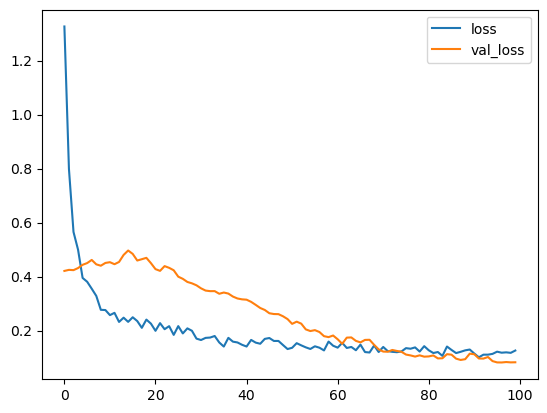

Epoch 1/100
6/6 [==============================] - 10s 362ms/step - loss: 1.0201 - val_loss: 2.2997
Epoch 2/100
6/6 [==============================] - 0s 50ms/step - loss: 0.4855 - val_loss: 2.0368
Epoch 3/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3231 - val_loss: 1.9227
Epoch 4/100
6/6 [==============================] - 0s 50ms/step - loss: 0.3070 - val_loss: 1.9155
Epoch 5/100
6/6 [==============================] - 0s 50ms/step - loss: 0.2458 - val_loss: 1.9412
Epoch 6/100
6/6 [==============================] - 0s 52ms/step - loss: 0.2253 - val_loss: 1.9861
Epoch 7/100
6/6 [==============================] - 0s 51ms/step - loss: 0.2044 - val_loss: 2.0168
Epoch 8/100
6/6 [==============================] - 0s 53ms/step - loss: 0.2116 - val_loss: 2.0070
Epoch 9/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1931 - val_loss: 1.9787
Epoch 10/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1618 - val_loss: 1.9589
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0414 - val_loss: 0.2566
Epoch 85/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0404 - val_loss: 0.2512
Epoch 86/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0441 - val_loss: 0.2363
Epoch 87/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0418 - val_loss: 0.2241
Epoch 88/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0369 - val_loss: 0.2185
Epoch 89/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0356 - val_loss: 0.2044
Epoch 90/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0418 - val_loss: 0.2068
Epoch 91/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0431 - val_loss: 0.2106
Epoch 92/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0375 - val_loss: 0.2261
Epoch 93/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0480 - val_loss: 0.2232
Epoch 94/1

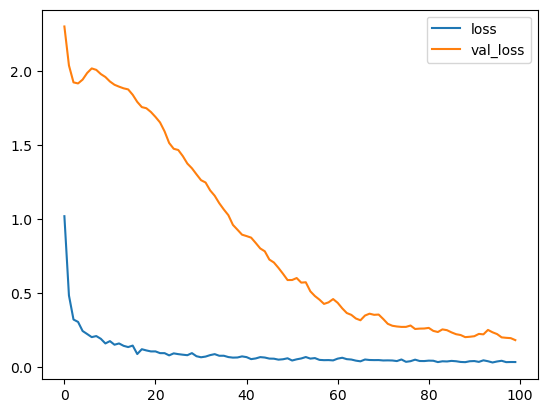

Epoch 1/100
6/6 [==============================] - 9s 331ms/step - loss: 0.8200 - val_loss: 2.6522
Epoch 2/100
6/6 [==============================] - 0s 50ms/step - loss: 0.3759 - val_loss: 2.3651
Epoch 3/100
6/6 [==============================] - 0s 49ms/step - loss: 0.2835 - val_loss: 2.3618
Epoch 4/100
6/6 [==============================] - 0s 55ms/step - loss: 0.2410 - val_loss: 2.4486
Epoch 5/100
6/6 [==============================] - 0s 54ms/step - loss: 0.2156 - val_loss: 2.4742
Epoch 6/100
6/6 [==============================] - 0s 49ms/step - loss: 0.1891 - val_loss: 2.4394
Epoch 7/100
6/6 [==============================] - 0s 52ms/step - loss: 0.1911 - val_loss: 2.3901
Epoch 8/100
6/6 [==============================] - 0s 49ms/step - loss: 0.1453 - val_loss: 2.3606
Epoch 9/100
6/6 [==============================] - 0s 50ms/step - loss: 0.1351 - val_loss: 2.3300
Epoch 10/100
6/6 [==============================] - 0s 48ms/step - loss: 0.1300 - val_loss: 2.2878
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0330 - val_loss: 0.5481
Epoch 85/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0302 - val_loss: 0.5575
Epoch 86/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0318 - val_loss: 0.5697
Epoch 87/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0336 - val_loss: 0.5825
Epoch 88/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0365 - val_loss: 0.5898
Epoch 89/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0330 - val_loss: 0.5436
Epoch 90/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0286 - val_loss: 0.5102
Epoch 91/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0291 - val_loss: 0.5139
Epoch 92/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0247 - val_loss: 0.6011
Epoch 93/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0319 - val_loss: 0.6439
Epoch 94/1

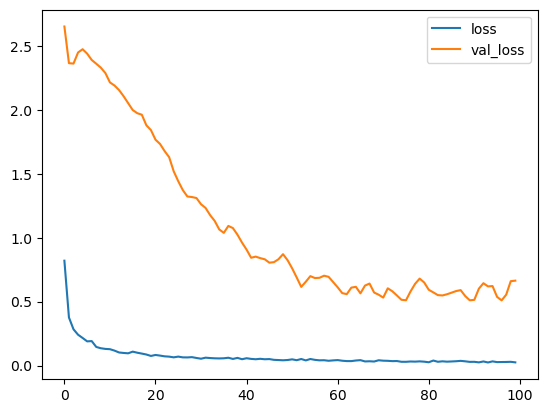

Epoch 1/100
6/6 [==============================] - 10s 322ms/step - loss: 1.1321 - val_loss: 1.4898
Epoch 2/100
6/6 [==============================] - 0s 53ms/step - loss: 0.5851 - val_loss: 1.3404
Epoch 3/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3912 - val_loss: 1.2605
Epoch 4/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3641 - val_loss: 1.1899
Epoch 5/100
6/6 [==============================] - 0s 51ms/step - loss: 0.2286 - val_loss: 1.1402
Epoch 6/100
6/6 [==============================] - 0s 51ms/step - loss: 0.2757 - val_loss: 1.1181
Epoch 7/100
6/6 [==============================] - 0s 54ms/step - loss: 0.2356 - val_loss: 1.0992
Epoch 8/100
6/6 [==============================] - 0s 53ms/step - loss: 0.1843 - val_loss: 1.0935
Epoch 9/100
6/6 [==============================] - 0s 53ms/step - loss: 0.2263 - val_loss: 1.0875
Epoch 10/100
6/6 [==============================] - 0s 53ms/step - loss: 0.1995 - val_loss: 1.0699
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0580 - val_loss: 0.1097
Epoch 85/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0552 - val_loss: 0.1006
Epoch 86/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0708 - val_loss: 0.0932
Epoch 87/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0574 - val_loss: 0.0961
Epoch 88/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0511 - val_loss: 0.0975
Epoch 89/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0581 - val_loss: 0.0992
Epoch 90/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0674 - val_loss: 0.1053
Epoch 91/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0578 - val_loss: 0.1074
Epoch 92/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0625 - val_loss: 0.0972
Epoch 93/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0486 - val_loss: 0.0907
Epoch 94/1

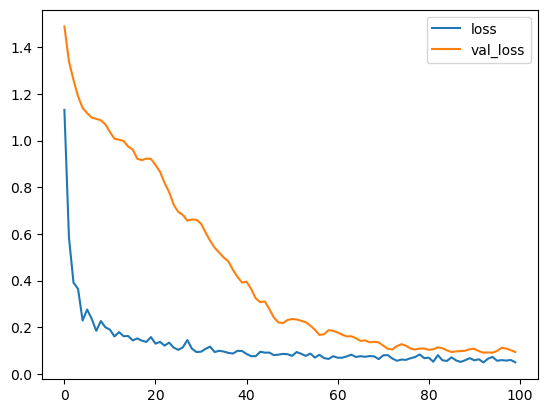

Epoch 1/100
6/6 [==============================] - 10s 343ms/step - loss: 1.2752 - val_loss: 0.4433
Epoch 2/100
6/6 [==============================] - 0s 52ms/step - loss: 0.7063 - val_loss: 0.4515
Epoch 3/100
6/6 [==============================] - 0s 49ms/step - loss: 0.4704 - val_loss: 0.4887
Epoch 4/100
6/6 [==============================] - 0s 51ms/step - loss: 0.3768 - val_loss: 0.5426
Epoch 5/100
6/6 [==============================] - 0s 52ms/step - loss: 0.2612 - val_loss: 0.5698
Epoch 6/100
6/6 [==============================] - 0s 52ms/step - loss: 0.2236 - val_loss: 0.5664
Epoch 7/100
6/6 [==============================] - 0s 48ms/step - loss: 0.2481 - val_loss: 0.5430
Epoch 8/100
6/6 [==============================] - 0s 46ms/step - loss: 0.2252 - val_loss: 0.5194
Epoch 9/100
6/6 [==============================] - 0s 57ms/step - loss: 0.2110 - val_loss: 0.5163
Epoch 10/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1966 - val_loss: 0.5177
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0647 - val_loss: 0.0676
Epoch 85/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0830 - val_loss: 0.0655
Epoch 86/100
6/6 [==============================] - 0s 57ms/step - loss: 0.0708 - val_loss: 0.0916
Epoch 87/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0663 - val_loss: 0.0826
Epoch 88/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0853 - val_loss: 0.0686
Epoch 89/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0664 - val_loss: 0.0610
Epoch 90/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0727 - val_loss: 0.0701
Epoch 91/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0682 - val_loss: 0.0720
Epoch 92/100
1/1 [==============================] - 1s 1s/step
        Date        Open
0 2023-11-30  249.903015
1 2023-12-01  249.545609
2 2023-12-02  248.971222
3 2023-12-03  245.286621
4 2023-12-04  244.01

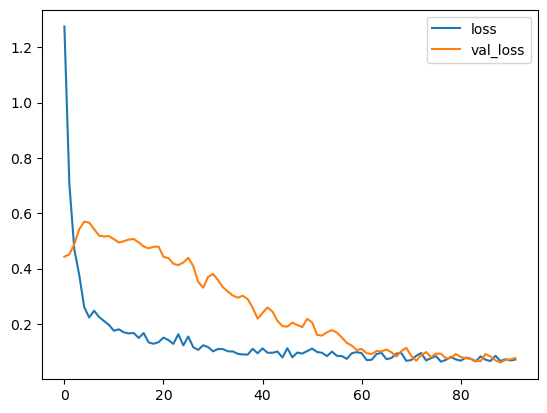

Epoch 1/100
6/6 [==============================] - 9s 341ms/step - loss: 1.2500 - val_loss: 0.6954
Epoch 2/100
6/6 [==============================] - 0s 50ms/step - loss: 0.6787 - val_loss: 0.6319
Epoch 3/100
6/6 [==============================] - 0s 53ms/step - loss: 0.4572 - val_loss: 0.5952
Epoch 4/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3914 - val_loss: 0.5803
Epoch 5/100
6/6 [==============================] - 0s 53ms/step - loss: 0.3656 - val_loss: 0.5695
Epoch 6/100
6/6 [==============================] - 0s 50ms/step - loss: 0.3472 - val_loss: 0.5478
Epoch 7/100
6/6 [==============================] - 0s 57ms/step - loss: 0.3015 - val_loss: 0.5189
Epoch 8/100
6/6 [==============================] - 0s 51ms/step - loss: 0.2663 - val_loss: 0.4929
Epoch 9/100
6/6 [==============================] - 0s 56ms/step - loss: 0.2433 - val_loss: 0.4937
Epoch 10/100
6/6 [==============================] - 0s 54ms/step - loss: 0.2330 - val_loss: 0.5034
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0952 - val_loss: 0.0583
Epoch 85/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0952 - val_loss: 0.0593
Epoch 86/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0921 - val_loss: 0.0582
Epoch 87/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0809 - val_loss: 0.0554
Epoch 88/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0926 - val_loss: 0.0549
Epoch 89/100
6/6 [==============================] - 0s 46ms/step - loss: 0.0902 - val_loss: 0.0532
Epoch 90/100
6/6 [==============================] - 0s 47ms/step - loss: 0.1063 - val_loss: 0.0530
Epoch 91/100
6/6 [==============================] - 0s 48ms/step - loss: 0.1003 - val_loss: 0.0532
Epoch 92/100
6/6 [==============================] - 0s 47ms/step - loss: 0.1059 - val_loss: 0.0528
Epoch 93/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0951 - val_loss: 0.0564
Epoch 94/1

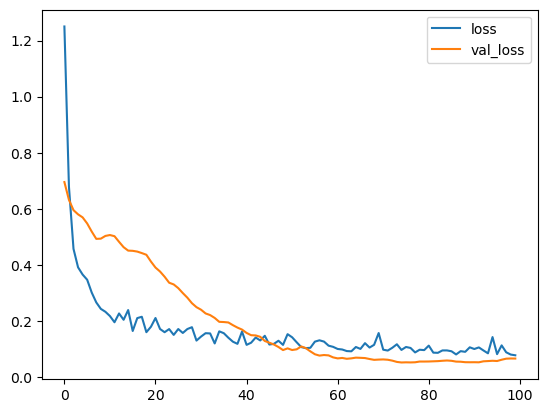

Epoch 1/100
6/6 [==============================] - 10s 316ms/step - loss: 1.3533 - val_loss: 1.1544
Epoch 2/100
6/6 [==============================] - 0s 49ms/step - loss: 0.6574 - val_loss: 1.2074
Epoch 3/100
6/6 [==============================] - 0s 50ms/step - loss: 0.4804 - val_loss: 1.2337
Epoch 4/100
6/6 [==============================] - 0s 48ms/step - loss: 0.3347 - val_loss: 1.2553
Epoch 5/100
6/6 [==============================] - 0s 49ms/step - loss: 0.2474 - val_loss: 1.2807
Epoch 6/100
6/6 [==============================] - 0s 50ms/step - loss: 0.1950 - val_loss: 1.3027
Epoch 7/100
6/6 [==============================] - 0s 49ms/step - loss: 0.1487 - val_loss: 1.3211
Epoch 8/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1274 - val_loss: 1.3281
Epoch 9/100
6/6 [==============================] - 0s 54ms/step - loss: 0.1036 - val_loss: 1.3142
Epoch 10/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1083 - val_loss: 1.2901
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0390 - val_loss: 0.3532
Epoch 85/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0382 - val_loss: 0.3501
Epoch 86/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0443 - val_loss: 0.3488
Epoch 87/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0378 - val_loss: 0.3507
Epoch 88/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0367 - val_loss: 0.3444
Epoch 89/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0428 - val_loss: 0.3416
Epoch 90/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0381 - val_loss: 0.3361
Epoch 91/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0335 - val_loss: 0.3167
Epoch 92/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0330 - val_loss: 0.2834
Epoch 93/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0359 - val_loss: 0.2910
Epoch 94/1

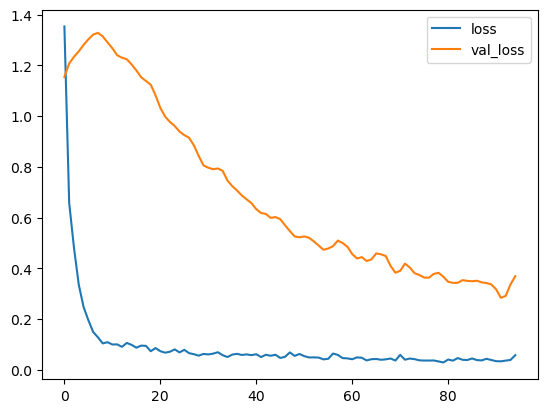

Epoch 1/100
6/6 [==============================] - 9s 367ms/step - loss: 1.8063 - val_loss: 1.2276
Epoch 2/100
6/6 [==============================] - 0s 52ms/step - loss: 0.8287 - val_loss: 1.0723
Epoch 3/100
6/6 [==============================] - 0s 53ms/step - loss: 0.5275 - val_loss: 1.0263
Epoch 4/100
6/6 [==============================] - 0s 54ms/step - loss: 0.4109 - val_loss: 1.0398
Epoch 5/100
6/6 [==============================] - 0s 52ms/step - loss: 0.3286 - val_loss: 1.0910
Epoch 6/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3183 - val_loss: 1.1730
Epoch 7/100
6/6 [==============================] - 0s 54ms/step - loss: 0.2756 - val_loss: 1.2179
Epoch 8/100
6/6 [==============================] - 0s 52ms/step - loss: 0.2596 - val_loss: 1.2340
Epoch 9/100
6/6 [==============================] - 0s 53ms/step - loss: 0.1984 - val_loss: 1.2654
Epoch 10/100
6/6 [==============================] - 0s 50ms/step - loss: 0.2164 - val_loss: 1.2938
Epoch 11/100
6/6 [

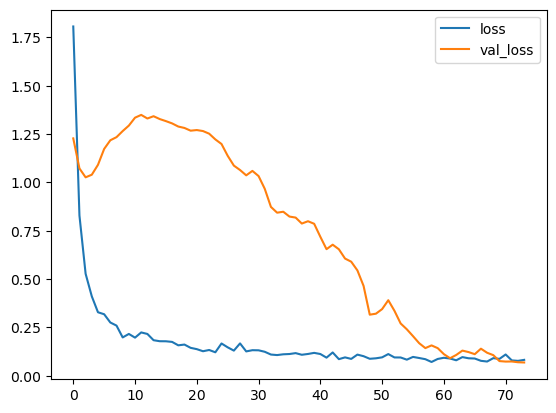

In [18]:
d={'AXIS':df_axis, 'SBI':df_sbi, 'RBL': df_rbl ,'PNB': df_pnb ,'KOTAK': df_kot, 
   'INDUSIND':df_ind, 'IDFC': df_idfc, 'ICIC': df_icic , 'BANDHAN': df_band, 'HDB': df_hdfc, 'FEDERAL': df_fed,
   'AU FIN':df_au}

for x in d.keys():
    results1(d[x], 30, 1, Scale, x)